In [2]:
import numpy as np
import matplotlib.pyplot as plt

## PT1 + I

The transfer function of the process:

$$ P(s) = \frac{k}{1+T_1 s}$$

and the conroller:

$$ C(s) = \frac{1}{T_I s} $$

The open loop transfer function $G_0(s)=C(s)P(s)$ :

$$ G_0(s) = \frac{k}{T_I s(1+T_1 s)}$$

the closed loop transfer function for reference tracking is (homework to check):

$$ G(s) = \frac{G_0(s)}{1+G_0(s)}$$

$$ G(s) = \frac{1}{1+2\xi T s + T^2 s^2}$$

where

$$ T = \sqrt{\frac{T_I T_1}{k}}$$

$$ \xi = \frac{T_I}{2\sqrt{k T_I T_1}}$$

**Q1.** Calculate the frequency response of the open loop and closed loop and plot them in Bode-plot!
(Open loop given as example.)

In [2]:
# Defining Gjom for open loop
k = 2
T1 = 1/10
TI = 1

N = 1000
omega = np.logspace(-2,3,N)
G0_jom = k/(TI*1j*omega*(1+T1*1j*omega))

# for Bode
K0om = np.abs(G0_jom)
K0om_dB = 20*np.log10(K0om)
phi0om = np.angle(G0_jom)
# for Nyquist
reG0 = np.real(G0_jom)
imG0 = np.imag(G0_jom)

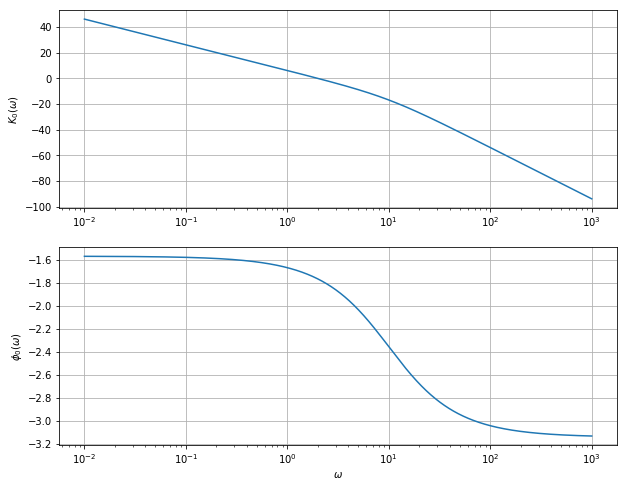

In [3]:
# Bode plot of open loop
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.semilogx(omega,K0om_dB), plt.grid(True), plt.ylabel('$K_0(\omega)$')
plt.subplot(2,1,2)
plt.semilogx(omega,phi0om), plt.grid(True), plt.ylabel('$\phi_0(\omega)$'), plt.xlabel('$\omega$');

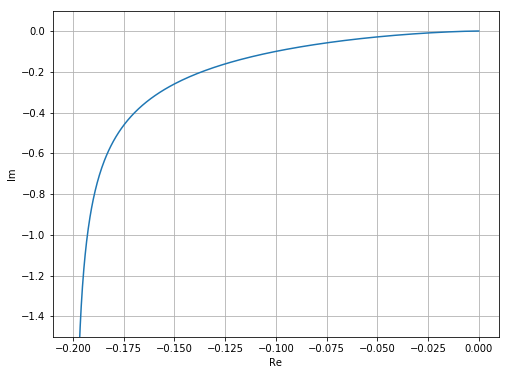

In [4]:
# Nyquist plot of open loop
plt.figure(figsize=(8,6))
plt.plot(reG0,imG0), plt.grid(True)
plt.ylim([-1.5,0.1]) # override autoscaled y axis to have a better looking plot (try commenting this line)
plt.xlabel('Re'), plt.ylabel('Im');

In [51]:
# Defining Gjom for closed loop
k = 2
T1 = 1/10
TI = 1
xi = T1/2*np.sqrt(T1*TI*k)
T = np.sqrt(T1*TI/k)

omega = np.logspace(-2,3,1000)
Gjom_c = 1/(1+2*xi*T*1j*omega-T**2*omega**2)

# for Bode
Kom_c = np.abs(Gjom_c)
Kom_dB_c = 20*np.log10(Kom_c)
phiom_c = np.angle(Gjom_c)
# for Nyquist
reG_c = np.real(Gjom_c)
imG_c = np.imag(Gjom_c)

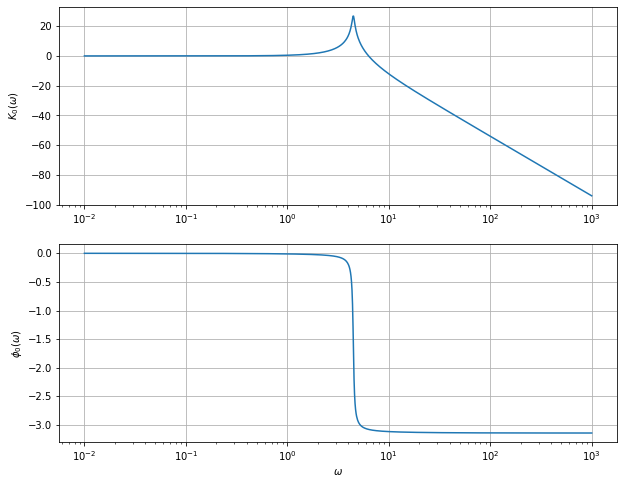

In [52]:
# Bode plot of closed loop
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.semilogx(omega,Kom_dB_c), plt.grid(True), plt.ylabel('$K_0(\omega)$')
plt.subplot(2,1,2)
plt.semilogx(omega,phiom_c), plt.grid(True), plt.ylabel('$\phi_0(\omega)$'), plt.xlabel('$\omega$');

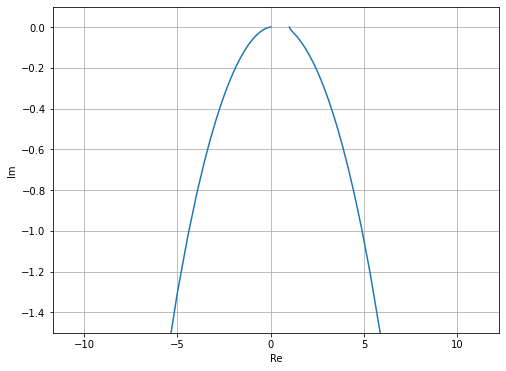

In [56]:
# Nyquist plot of closed loop
plt.figure(figsize=(8,6))
plt.plot(reG_c,imG_c), plt.grid(True)
plt.ylim([-1.5,0.1])
plt.xlabel('Re'), plt.ylabel('Im');

**Q2.** Investigate the effect of parameter ($k, T_1, T_I$) changes.

In [ ]:
# k is the gain of the PT1 process.

# Since T1 is the time taken for process to reach
# ~63% of its gain, increasing/decreasing this
# value affects accordingly.

# TI is related to the I controller.
# Changing this value affects the output
# of the controller inversely. Lower values
# may result in overshoot.